In [25]:
%load_ext autoreload
%autoreload 2
import os

import numpy as np
import pandas as pd

import fairlearn.moments as moments

from load_data import load_adult, load_compas


from util import _experiment, save_all_data, restore_all_data, summarize_stats, _plot



# In order to make debugging easier, leave the following two wrapper functions in this notebook rather than put them into
# util.py for now.

def experiment(dataset, rho, frac, eps_list, criteria, classifier, trials, include_sensible, filename, verbose=False):
    '''
    dataset: one of ['compas', 'adult']
    rho: [a, b] where a, b in interval [0,0.5]
    frac: real number in interval [0,1]. The fraction of the data points in chosen dataset to use.
    eps_list: a list of non-negative real numbers
    criteria: one of ['DP','EO']
    classifier: one of ['Agarwal', 'Zafar', 'Shai']. Zafar is the fastest.
                Shai will ignore eps_list since eps=0 is inherent in this implementation.
    trials: the number of trials to run
    include_sensible: boolean. If to include sensitive attribute as a feature for optimizing the oroginal loss. Note that even
                      if this is set to False, sensitive attribute will still be used for constraint(s).
    filename: the file name to store the log of experiment(s).
    verbose: boolean. If print out info at each run.
    '''
    sensible_name = None
    sensible_feature = None

    if dataset == 'adult':
        datamat = load_adult(frac)
        sensible_name = 'gender'
        sensible_feature = 9
    else:
        datamat = load_compas(frac)
        sensible_name = 'race'
        sensible_feature = 4
        
    if criteria == 'EO':
        tests = [{"cons_class": moments.EO, "eps": eps} for eps in eps_list]
    else:
        tests = [{"cons_class": moments.DP, "eps": eps} for eps in eps_list]

    all_data = _experiment(datamat, tests, rho, trials, sensible_name, sensible_feature, criteria, classifier, include_sensible, verbose)
    save_all_data(filename, all_data, eps_list)
    
    return all_data
        

def plot(filename):
    all_data, eps_list = restore_all_data(filename)
    data = summarize_stats(all_data)

    keys = ["disp_train", "disp_test", "error_train", "error_test"]
    xlabels = ['epsilon' for _ in range(4)]
    ylabels = ['violation', 'violation', 'error', 'error']
    for k, xl, yl in zip(keys, xlabels, ylabels):
        _plot(eps_list, data, k, xl, yl, filename)

        
log_dir = 'experiment_log/'
if not os.path.isdir(log_dir):
    os.mkdir(log_dir)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
dataset = 'adult'
rho = [0.4, 0.4]
frac = 1
eps_list = [0.005 * i for i in range(2, 9)]
criteria = 'DP'
classifier = 'Zafar'
trials = 5
include_sensible = False
filename = 'experiment_log/'+'all_data('+dataset+str(rho[0])+','+str(rho[1])+','+str(frac)+','+criteria \
           +','+classifier+','+str(trials)+','+str(include_sensible)+').pickle'
verbose = False

all_data = experiment(dataset, rho, frac, eps_list, criteria, classifier, trials, include_sensible, filename, verbose)


Looking for file 'datasets/adult.data' in the current directory...
File found in current directory..
Looking for file 'datasets/adult.test' in the current directory...
File found in current directory..


/Users/ZiyuanZhong/.python_venvs/ml3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The dataset is loaded...
trial: 0 time: 9.5367431640625e-07
trial: 1 time: 54.484009981155396
Optimization problem did not converge.. Check the solution returned by the optimizer.
Returned solution is:
     fun: 19065.047197975324
     jac: array([ -348.53271484,  -201.18969727,   -55.81542969,   102.36035156,
         -68.44360352,  1020.51049805,  -774.27319336,  4568.48071289,
        -384.15771484,  -254.38256836,  -210.51220703, -2108.44897461,
         157.27905273])
 message: 'Positive directional derivative for linesearch'
    nfev: 339
     nit: 23
    njev: 19
  status: 8
 success: False
       x: array([ 0.41073916, -0.05418636,  0.04361017, -0.0104405 ,  0.68799027,
       -0.12434982, -0.05809125,  0.39253181,  0.10035963,  5.40991245,
        0.2597266 ,  0.07614485,  0.0110343 ])
trial: 2 time: 114.58658480644226
Optimization problem did not converge.. Check the solution returned by the optimizer.
Returned solution is:
     fun: 19978.223737337248
     jac: array([ -389.

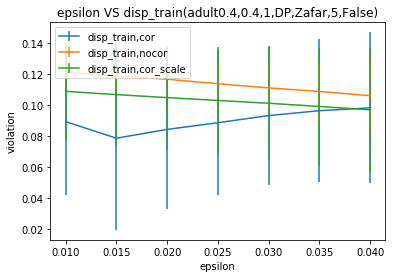

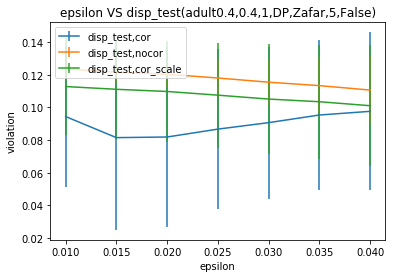

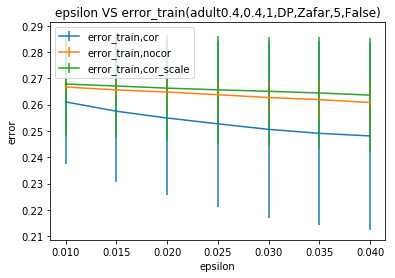

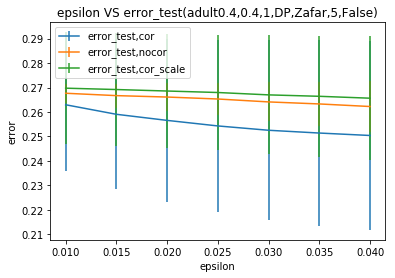

In [53]:
plot(filename)

In [58]:
dataset = 'compas'
rho = [0.48, 0.48]
frac = 1
eps_list = [0.01 * i for i in range(1, 9)]
criteria = 'DP'
classifier = 'Agarwal'
trials = 3
include_sensible = False
filename = 'experiment_log/'+'all_data('+dataset+str(rho[0])+','+str(rho[1])+','+str(frac)+','+criteria \
           +','+classifier+','+str(trials)+','+str(include_sensible)+').pickle'
verbose = False

all_data = experiment(dataset, rho, frac, eps_list, criteria, classifier, trials, include_sensible, filename, verbose)

Looking for file 'datasets/compas-scores-two-years.csv' in the current directory...
File found in current directory..

Number of people recidivating within two years
0    2795
1    2483
dtype: int64


{'race': array([0, 0, 1, ..., 0, 0, 0])}
Features we will be using for classification are: ['intercept', 'age_cat_25 - 45', 'age_cat_Greater than 45', 'age_cat_Less than 25', 'race', 'sex', 'priors_count', 'c_charge_degree'] 

trial: 0 time: 1.1920928955078125e-06
trial: 1 time: 108.74228715896606
trial: 2 time: 208.11709713935852


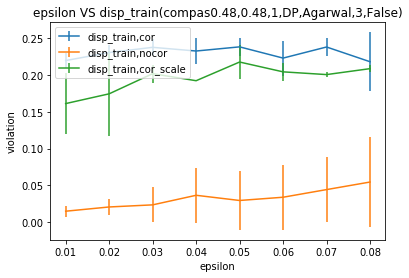

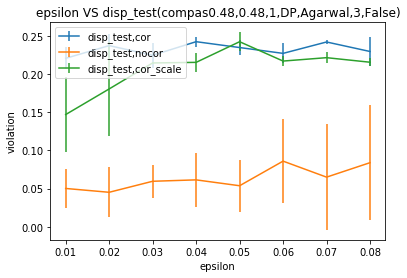

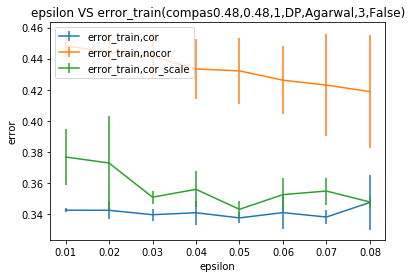

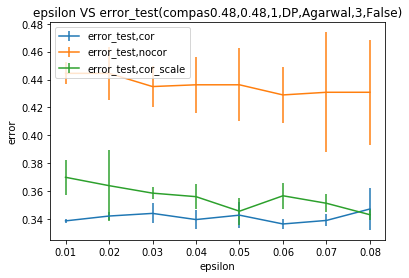

In [59]:
plot(filename)